In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast = load_breast_cancer() # load_breast_cancer(as_frame = True)로 하면 바로 데이터 프레임으로 불러옴!

In [4]:
breast.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [35]:
print(breast['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
X = pd.DataFrame(breast['data'], columns = breast['feature_names'])

In [7]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
Y = breast['target']

In [9]:
np.unique(Y, return_counts = True) # 0,1의 개수를 보여줌
# 0이 악성, 1이 악성이 아닌 것(정상)

(array([0, 1]), array([212, 357]))

<AxesSubplot:ylabel='count'>

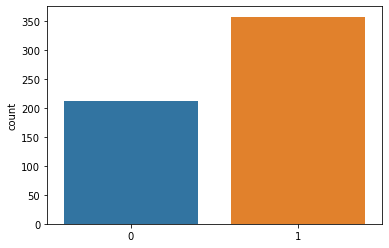

In [10]:
# Y의 데이터의 개수를 알아보기 위해 시각화
sns.countplot(x=Y) # 이것을 불균형 데이터라고 함(50:50의 비율이 아닌 데이터) --> 현재까지 이슈(Issue)

----
# 🙋🏻‍♂️ Train, Test Data Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 48)

----
# Modeling

In [13]:
from sklearn.tree import DecisionTreeClassifier as DT

### sklearn.tree.DecisionTreeClassifier
1) Parameter
 * criterion(기준) => gini or entropy
 * splitter
 * max_depth
 그 외의 것들은 API 참조하기!

In [14]:
dt = DT(max_depth = None) # default로 생성
# max_depth에 따라 predict_proba가 왜 달라지는지 생각해보자!

In [15]:
dt.fit(Train_X, Train_Y)

DecisionTreeClassifier()

In [28]:
dt.predict(Test_X)

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0])

In [29]:
Test_Y

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0])

In [16]:
pred_proba = dt.predict_proba(Train_X)

In [17]:
pred_proba.shape

(455, 2)

In [18]:
# 예측 완료
pred_Y = dt.predict(Test_X)

In [19]:
pred_Y

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0])

----
# Model 평가하기 - Classification Performance Measure

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(y_true = Test_Y, y_pred = pred_Y, labels = [0,1])

In [37]:
print(cm)

[[44  2]
 [ 5 63]]


In [22]:
accuracy = (cm[0][0] + cm[1][1]) / (np.sum(cm))
miss = (cm[0][1] + cm[1][0]) / (np.sum(cm))

In [30]:
print("정분류율: {:.2f}".format(accuracy*100))
print("오분류율: {:.2f}".format(miss*100))

정분류율: 93.86
오분류율: 6.14


In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_true = Test_Y, y_pred = pred_Y)

0.9385964912280702

In [33]:
# accuracy_score에 의지하지 말것(해석에 따라 너무 다양하게 볼 수 있기 때문) -> 다른 지표들이 필요할 것이다!

* 민감도(Sensivity) 
   - P(예측=1|실제=1) = n11 / (n11 + n10)
* 특이도(Specificity) 
   - P(예측=0 | 실제=0) = n00 / (n01 + n00)
* 정밀도
  - P(실제=1|예측=1) = n11 / (n11 + n01) => 신뢰성과 연관이 있음
    

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [53]:
acc = accuracy_score(y_true = Test_Y, y_pred = pred_Y)
specifity = recall_score(y_true = Test_Y, y_pred = pred_Y)
precision = precision_score(y_true = Test_Y, y_pred = pred_Y)

print("Acc        >> {:.3f}".format(acc))
print("Specifity  >> {:.3f}".format(recall)) # P
print("Precision  >> {:.3f}".format(precision))

Acc        >> 0.939
Specifity  >> 0.957
Precision  >> 0.969


### But, 우리는 Positive를 0으로 설정했으므로 이것을 옵션 지정해야 함

### 다음 아래의 코드가 우리가 구하고자 하는 것임

In [54]:
acc = accuracy_score(y_true = Test_Y, y_pred = pred_Y)
recall = recall_score(y_true = Test_Y, y_pred = pred_Y, pos_label = 0) # 우리는 Positive를 0으로 설정했음
precision = precision_score(y_true = Test_Y, y_pred = pred_Y, pos_label = 0) # 우리는 Positive를 0으로 설정했음

print("Acc        >> {:.3f}".format(acc))
print("Recall     >> {:.3f}".format(recall))
print("Precision  >> {:.3f}".format(precision))

Acc        >> 0.939
Recall     >> 0.957
Precision  >> 0.898


----
## Error 관점에서 보면... (by 통계학)
* 제 1종 오류
    - P(예측=1|실제=0) = n01 / (n01 + n00)
* 제 2종 오류
    - P(예측=0|실제=1) = n10 / (n11 + n10)

----
* 균형 정확도 (민감도와 특이도의 기하 평균)
    - (TPR * TNR)^(1/2) = sqrt((n11/(n11+n10)) * (n00/(n01+n00)))
* F1-measure

In [56]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

In [58]:
acc = accuracy_score(y_true = Test_Y, y_pred = pred_Y)
recall = recall_score(y_true = Test_Y, y_pred = pred_Y, pos_label = 0) # 우리는 Positive를 0으로 설정했음
precision = precision_score(y_true = Test_Y, y_pred = pred_Y, pos_label = 0) # 우리는 Positive를 0으로 설정했음
f1 = f1_score(y_true = Test_Y, y_pred = pred_Y, pos_label = 0)
bas = balanced_accuracy_score(y_true = Test_Y, y_pred = pred_Y)

print("Acc               >> {:.3f}".format(acc))
print("Recall            >> {:.3f}".format(recall))
print("Precision         >> {:.3f}".format(precision))
print("F1 Measure        >> {:.3f}".format(f1))
print("Balanced Accuracy >> {:.3f}".format(bas))

Acc               >> 0.939
Recall            >> 0.957
Precision         >> 0.898
F1 Measure        >> 0.926
Balanced Accuracy >> 0.941
